**Sentiment Analysis**

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded=files.upload()

Saving GBcomments.csv to GBcomments.csv


In [6]:
import io
comments=pd.read_csv(io.BytesIO(uploaded['GBcomments.csv']),error_bad_lines=False)


b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [7]:
comments.head()

video_id  ... replies
0  jt2OHQh0HoQ  ...       0
1  jt2OHQh0HoQ  ...       0
2  jt2OHQh0HoQ  ...       0
3  jt2OHQh0HoQ  ...       0
4  jt2OHQh0HoQ  ...       0

[5 rows x 4 columns]

In [8]:
from textblob import TextBlob

In [9]:
TextBlob("It's more accurate to call it the M+ (1000) be").sentiment.polarity

0.45000000000000007

In [10]:
comments.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [11]:
comments.dropna(inplace=True)

In [13]:
polarity=[]
for i in comments['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)

In [14]:
comments['polarity']=polarity

In [15]:
comments.head(20)

video_id  ...  polarity
0   jt2OHQh0HoQ  ...  0.450000
1   jt2OHQh0HoQ  ...  0.000000
2   jt2OHQh0HoQ  ...  0.000000
3   jt2OHQh0HoQ  ...  0.000000
4   jt2OHQh0HoQ  ...  1.000000
5   jt2OHQh0HoQ  ...  0.300000
6   jt2OHQh0HoQ  ...  0.000000
7   jt2OHQh0HoQ  ... -0.100000
8   jt2OHQh0HoQ  ...  0.028571
9   jt2OHQh0HoQ  ...  0.500000
10  jt2OHQh0HoQ  ...  0.500000
11  jt2OHQh0HoQ  ...  0.000000
12  jt2OHQh0HoQ  ...  0.300000
13  jt2OHQh0HoQ  ...  0.026563
14  jt2OHQh0HoQ  ...  0.500000
15  jt2OHQh0HoQ  ...  0.500000
16  jt2OHQh0HoQ  ...  0.200000
17  jt2OHQh0HoQ  ...  0.250000
18  jt2OHQh0HoQ  ...  0.500000
19  jt2OHQh0HoQ  ...  0.300000

[20 rows x 5 columns]

**Perform Exploratory Data Analysis(EDA) for positive sentences**

In [16]:
comments_positive=comments[comments['polarity']==1]
comments_positive.shape

(20400, 5)

In [17]:
comments_positive.head()

video_id  ... polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0

[5 rows x 5 columns]

In [21]:
from wordcloud import WordCloud,STOPWORDS

In [26]:
stopwords=set(STOPWORDS)

In [24]:
total_comments=''.join(comments_positive['comment_text'])

In [28]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

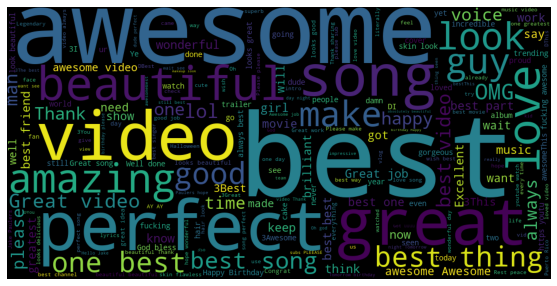

In [29]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

**Perform Exploratory Data Analysis(EDA) for negative sentences**

In [30]:
comments_negative=comments[comments['polarity']==-1]

In [31]:
comments_negative.head(20)

video_id  ... polarity
1387  ql0Op1VcELw  ...     -1.0
1394  ql0Op1VcELw  ...     -1.0
1530  -Ifnaxi2LQg  ...     -1.0
1745  F2uJvwiSZAQ  ...     -1.0
1793  F2uJvwiSZAQ  ...     -1.0
1873  a7Sf_H2cFdM  ...     -1.0
2377  7wGDvthZ0ng  ...     -1.0
2383  7wGDvthZ0ng  ...     -1.0
2561  TeSoGKTZQl8  ...     -1.0
2710  GpAuCG6iUcA  ...     -1.0
2733  GpAuCG6iUcA  ...     -1.0
2749  GpAuCG6iUcA  ...     -1.0
2977  itGLQk8oY2Q  ...     -1.0
3132  LTnl36-0-zU  ...     -1.0
3317  -yKW9NG2yNc  ...     -1.0
3412  -JmNKGfFj7w  ...     -1.0
3771  gG7JEFWQ_18  ...     -1.0
3821  NIpEbO-M6bY  ...     -1.0
4205  BlBztBP0OAs  ...     -1.0
4602  JsTptu56GM8  ...     -1.0

[20 rows x 5 columns]

In [34]:
total_negative_comments=''.join(comments_negative['comment_text'])

In [35]:
total_negative_comments

"boring0:22   **laughs at terrible pun**this is the worst thing i've heard. ever.People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect.Thats insane.How is this trending ? AwfulButthurt Sean, idiot!Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!!Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everythingPlease let this die, you can tell the actors are miserable.can't wait :'(Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nastyHandmaids Tale was boring, I foundI won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic!all the products are horriblejim carrey lost it, became a boring socialist hippyWinner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons.Terrible, at times like this we need to come together not stealYour style is

In [36]:
negative_wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_negative_comments)

(-0.5, 999.5, 499.5, -0.5)

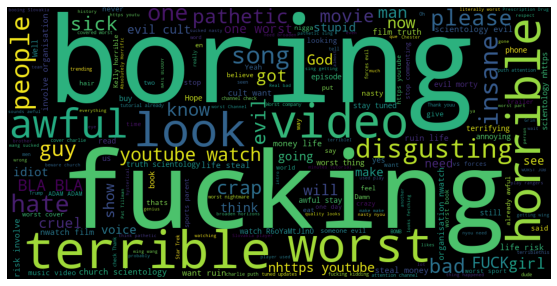

In [38]:
plt.figure(figsize=(15,5))
plt.imshow(negative_wordcloud)
plt.axis('off')

In [39]:
#EDA using function
def EDA(df,polarity):
  stop_words=set(STOPWORDS)
  df1=df[df['polarity']==polarity]
  total_comments=''.join(df1['comment_text'])
  wordcloud=WordCloud(height=500,width=1000,stopwords=stop_words).generate(total_comments)
  plt.figure(figsize=(15,5))
  plt.imshow(wordcloud)
  plt.axis('off')

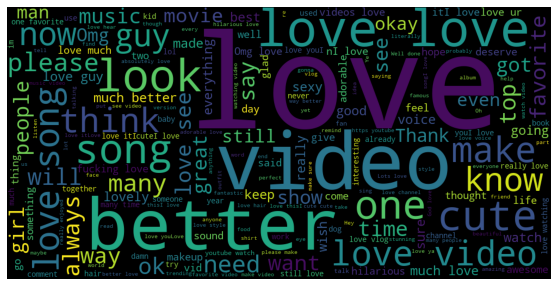

In [41]:
EDA(comments,0.5)

**Analyze tags column, wheat are trending tags on youtube**

In [42]:
from google.colab import files
uploaded=files.upload()

Saving USvideos.csv to USvideos.csv


In [43]:
import io
videos=pd.read_csv(io.BytesIO(uploaded['USvideos.csv']),error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [44]:
videos.head()

video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [46]:
tags_complete=' '.join(videos['tags'])

In [47]:
import re

In [50]:
#eliminating any charcater except alphabet
tags=re.sub('[^a-zA-Z]',' ',tags_complete)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [51]:
#eliminating extra spaces
tags=re.sub(' +',' ',tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

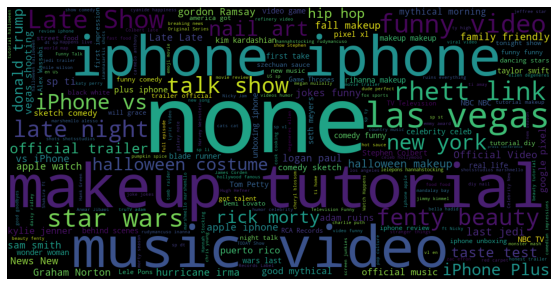

In [52]:
wordCloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordCloud)
plt.axis('off')

**Perform Analysis on likes, views and dislikes and find co-relation between them**

Text(0.5, 1.0, 'Views Vs Likes')

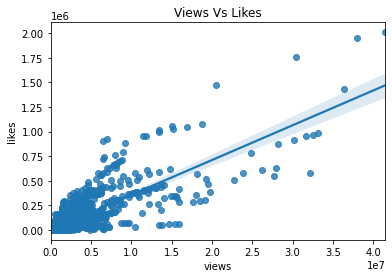

In [53]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Views Vs Likes')

Text(0.5, 1.0, 'Views Vs Dislikes')

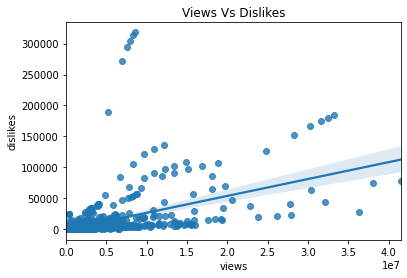

In [54]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Views Vs Dislikes')

**Corelation Matirx**

In [56]:
df_corr=videos[['views','likes','dislikes']]

In [57]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

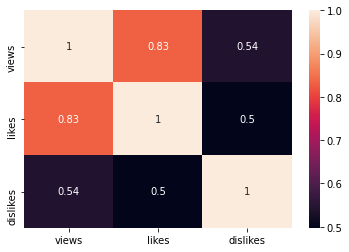

In [60]:
sns.heatmap(df_corr.corr(),annot=True)